<h1 style="color:DodgerBlue;">IIMK ADSM Case Study - Churn</h1>

1-May-21

In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

<h2 style="color:DodgerBlue;"> Load Data </h2>

In [2]:
df_churn_data_0 = pd.read_csv("churn.csv")
df_churn_data_0.head()

,Sl.No.,State,Account.Length,Area.Code,Phone,Int.l.Plan,VMail.Plan,VMail.Message,Day.Mins,Day.Calls,...,Eve.Calls,Eve.Charge,Night.Mins,Night.Calls,Night.Charge,Intl.Mins,Intl.Calls,Intl.Charge,CustServ.Calls,Churn
0,1,KS,128,415,382-4657,no,yes,25,265.1,110,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,2,OH,107,415,371-7191,no,yes,26,161.6,123,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,3,NJ,137,415,358-1921,no,no,0,243.4,114,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,4,OH,84,408,375-9999,yes,no,0,299.4,71,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,5,OK,75,415,330-6626,yes,no,0,166.7,113,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


<h2 style="color:DodgerBlue;"> Data Preparation </h2>

In [3]:
df_churn_data_0.columns

Index(['Sl.No.', 'State', 'Account.Length', 'Area.Code', 'Phone', 'Int.l.Plan',
       'VMail.Plan', 'VMail.Message', 'Day.Mins', 'Day.Calls', 'Day.Charge',
       'Eve.Mins', 'Eve.Calls', 'Eve.Charge', 'Night.Mins', 'Night.Calls',
       'Night.Charge', 'Intl.Mins', 'Intl.Calls', 'Intl.Charge',
       'CustServ.Calls', 'Churn'],
      dtype='object')

In [4]:
df_churn_data_1 = df_churn_data_0.copy()
df_churn_data_1.drop(['Sl.No.', 'State', 'Account.Length', 'Area.Code', 'Phone'], axis=1, inplace=True)

In [5]:
df_churn_data_1.head()

,Int.l.Plan,VMail.Plan,VMail.Message,Day.Mins,Day.Calls,Day.Charge,Eve.Mins,Eve.Calls,Eve.Charge,Night.Mins,Night.Calls,Night.Charge,Intl.Mins,Intl.Calls,Intl.Charge,CustServ.Calls,Churn
0,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
df_churn_data_2 = pd.get_dummies(df_churn_data_1, columns=['Int.l.Plan', 'VMail.Plan','Churn' ],drop_first=True)
df_churn_data_2.head()

,VMail.Message,Day.Mins,Day.Calls,Day.Charge,Eve.Mins,Eve.Calls,Eve.Charge,Night.Mins,Night.Calls,Night.Charge,Intl.Mins,Intl.Calls,Intl.Charge,CustServ.Calls,Int.l.Plan_yes,VMail.Plan_yes,Churn_True
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1,0
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1,0
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1,0,0
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1,0,0


In [7]:
df_churn_data_3 = df_churn_data_2.rename(columns={'Churn_True': 'Churn', 'Int.l.Plan_yes': 'Int.l.Plan', 'VMail.Plan_yes': 'VMail.Plan'})
df_churn_data_3.head()

,VMail.Message,Day.Mins,Day.Calls,Day.Charge,Eve.Mins,Eve.Calls,Eve.Charge,Night.Mins,Night.Calls,Night.Charge,Intl.Mins,Intl.Calls,Intl.Charge,CustServ.Calls,Int.l.Plan,VMail.Plan,Churn
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1,0
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1,0
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1,0,0
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1,0,0


<h2 style="color:DodgerBlue;"> Create Models </h2>

In [8]:
df_churn_data_3.to_csv("..\Random_Forest\credit_data_modified.csv")

In [8]:
#split dataset in features and target variable

X = df_churn_data_3.drop("Churn", axis=1)
y = df_churn_data_3["Churn"]

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [9]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

<h2 style="color:DodgerBlue;"> Logistic Regression </h2>

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.677


C:\Users\Artist of Analytics\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


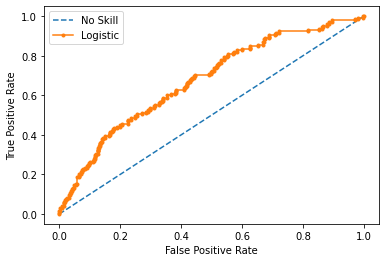

In [10]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# split into train/test sets
#X_train, X_test, y_train, y_test

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

<h2 style="color:DodgerBlue;"> Decision Tree </h2>

Accuracy: 0.928
No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.875


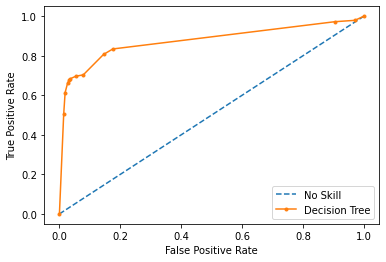

In [11]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# predict probabilities
clf_probs = clf.predict_proba(X_test)

clf_probs = clf_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
clf_auc = roc_auc_score(y_test, clf_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (clf_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
clf_fpr, clf_tpr, _ = roc_curve(y_test, clf_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(clf_fpr, clf_tpr, marker='.', label='Decision Tree')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

<h2 style="color:DodgerBlue;"> Compare Models </h2>

No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.875
Logistic: ROC AUC=0.677


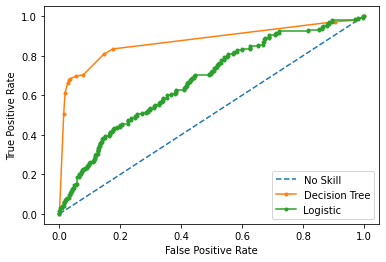

In [12]:
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (clf_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(clf_fpr, clf_tpr, marker='.', label='Decision Tree')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()